## 神经网络

B站视频：https://www.bilibili.com/video/av43265928/

人工神经网络（Artificial Neural Network，ANN）是模仿自然界中神经网络的形式，构建的各个节点的网络。

### 神经元

ANN中的神经元是接受输入并且给出输出的节点。

#### 激活

上一讲是使用线性的结构，这样每一个神经元都对输出有且仅有线性的影响，无法实现非线性函数的效果。

使用**激活函数**（即一个非线性的函数）来进行非线性的操作，这样就可以避免输出仅仅是输入的线性函数。

- 比如异或操作就不能简单用线性的方法二分类。

激活函数：

- sigmoid：$\frac{1}{1+e^{-t}}$
  - ![sigmoid](Tensorflow03-NeuralNetwork.assets/1548855985364.png)
  - 会梯度消失（左边和右边梯度为0，这样算出来的梯度就是几乎为0了）
- tanh：$\frac{e^t-e^{-t}}{e^t+e^{-t}}$
  - ![1548856267535](Tensorflow03-NeuralNetwork.assets/1548856267535.png)
  - 只是sigmoid稍微变了一下，仍然会梯度消失
- ReLU：$\max(0, t)$
  - ![1548856378264](Tensorflow03-NeuralNetwork.assets/1548856378264.png)
  - 右侧不会有梯度消失，但容易死亡（左侧区间梯度为0）
- Leak ReLU：$\max(\alpha t, t)$
  - $\alpha$是一个很小的常数，这样梯度就不是0了

### 带有激活函数的神经网络

#### 分类问题

使用一个简单的二分类神经网络。实现异或的训练。

sigmoid函数的范围是0~1，需要的结果是0或者1，直接把最后的结果加个sigmoid作为最后的结果。而loss函数直接用这个结果和已知的异或结果差的平方和来表示。

但是异或操作不是简单的一个线性的模型，所以不能直接用线性的方法进行处理，因此：
- 使用多层结构
- 添加激活函数，这里使用relu

最终使用的一个计算架构是：

- 隐藏层：$x (? \times 2\ 矩阵，其中的\ ?\ 指输入一批数据的大小) \times W_1 (2 \times 16\ 矩阵) + b_1 (所有元$$素都相同的一个\ ? \times 16\ 的矩阵)$，之后进行relu处理；
- 输出层：$隐藏层 (? \times 16\ 矩阵) \times W_2 (16 \times 1\ 矩阵) + b_2 (一个\ ? \times 1\ 的矩阵)$，之后进行sigmoid处理；得到的结果是一个$? \times 1$的矩阵，所以输入的$y$也使用一个$? \times 1$的形状。

参考https://blog.csdn.net/sysstc/article/details/75126420

In [6]:
import tensorflow as tf

# 要学习一个两层的网络
# 随便给个初始值
W1 = tf.Variable(tf.random_normal([2, 16]))
W2 = tf.Variable(tf.random_normal([16, 1]))
b1 = tf.Variable(0.)
b2 = tf.Variable(0.)

# 成批地进行计算，所以第一个维度不进行预设
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

# 为了添加非线性的因素，在隐藏层上添加一个激活函数
# 如果没有激活函数，相当于就是一个单纯的线性模型
inner = tf.nn.relu(tf.matmul(x, W1) + b1)
y0 = tf.nn.sigmoid(tf.matmul(inner, W2) + b2)  # 用当前的W和b计算出来的结果

loss = tf.reduce_sum(tf.square(y0 - y))

# 使用自带的最优化函数来做，rate设置成0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
 
x_train = [[0, 0], [1, 1], [0, 1], [1, 0]]
y_train = [[0], [0], [1], [1]]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(8001):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([y0, loss], {x: x_train, y: y_train}))

[array([[0.49988213],
       [0.22910865],
       [0.25100097],
       [0.9626661 ]], dtype=float32), 0.86476624]
[array([[0.49730173],
       [0.28204846],
       [0.38072318],
       [0.95347995]], dtype=float32), 0.7125283]
[array([[0.49277592],
       [0.31334952],
       [0.48242432],
       [0.94477296]], dtype=float32), 0.61195064]
[array([[0.4861188 ],
       [0.3176119 ],
       [0.5457904 ],
       [0.93280154]], dtype=float32), 0.5480108]
[array([[0.4784527 ],
       [0.3072495 ],
       [0.5884157 ],
       [0.92074466]], dtype=float32), 0.4990023]
[array([[0.47044477],
       [0.29300174],
       [0.6202858 ],
       [0.90810305]], dtype=float32), 0.45979622]
[array([[0.46242645],
       [0.2782943 ],
       [0.6455304 ],
       [0.89590037]], dtype=float32), 0.42777136]
[array([[0.45455548],
       [0.26468286],
       [0.6664529 ],
       [0.88465273]], dtype=float32), 0.40123641]
[array([[0.44689953],
       [0.2525639 ],
       [0.6842354 ],
       [0.874704  ]], dtype

[array([[0.19694042],
       [0.08373909],
       [0.9005914 ],
       [0.9245038 ]], dtype=float32), 0.06137951]
[array([[0.19547236],
       [0.08307491],
       [0.9014186 ],
       [0.9251597 ]], dtype=float32), 0.06043024]
[array([[0.19403018],
       [0.08236353],
       [0.90227735],
       [0.92572725]], dtype=float32), 0.059497617]
[array([[0.19261296],
       [0.0817491 ],
       [0.90307367],
       [0.92638963]], dtype=float32), 0.05859587]
[array([[0.19122007],
       [0.08104171],
       [0.9038974 ],
       [0.9269379 ]], dtype=float32), 0.057706658]
[array([[0.18985097],
       [0.08043081],
       [0.9046626 ],
       [0.92755836]], dtype=float32), 0.056849517]
[array([[0.18850525],
       [0.07976276],
       [0.9054553 ],
       [0.92809016]], dtype=float32), 0.056006055]
[array([[0.18718208],
       [0.07915112],
       [0.90619224],
       [0.9286848 ]], dtype=float32), 0.05518779]
[array([[0.18588124],
       [0.07853256],
       [0.90695643],
       [0.9292257 ]]

[array([[0.12998645],
       [0.05260236],
       [0.9382155 ],
       [0.9526722 ]], dtype=float32), 0.025720732]
[array([[0.12946409],
       [0.05236234],
       [0.9384951 ],
       [0.95288837]], dtype=float32), 0.025505126]
[array([[0.12894723],
       [0.0521389 ],
       [0.9387837 ],
       [0.9531024 ]], dtype=float32), 0.025292672]
[array([[0.12843567],
       [0.05189046],
       [0.9390558 ],
       [0.95330715]], dtype=float32), 0.02508276]
[array([[0.12792936],
       [0.05165887],
       [0.93932617],
       [0.9535169 ]], dtype=float32), 0.024876554]
[array([[0.12742828],
       [0.05144323],
       [0.93960536],
       [0.95372474]], dtype=float32), 0.024673285]
[array([[0.12693223],
       [0.05120315],
       [0.93986833],
       [0.95392334]], dtype=float32), 0.02447243]
[array([[0.12644121],
       [0.05099235],
       [0.9401414 ],
       [0.95412695]], dtype=float32), 0.02427499]
[array([[0.1259551 ],
       [0.05075944],
       [0.94039875],
       [0.9543218 ]

[array([[0.10135522],
       [0.03973993],
       [0.9535207 ],
       [0.9642607 ]], dtype=float32), 0.015289763]
[array([[0.10108448],
       [0.03962253],
       [0.9536632 ],
       [0.96436965]], dtype=float32), 0.01520464]
[array([[0.1008157 ],
       [0.03949983],
       [0.95380366],
       [0.9644741 ]], dtype=float32), 0.015120234]
[array([[0.10054884],
       [0.03938426],
       [0.953944  ],
       [0.96458155]], dtype=float32), 0.015036808]
[array([[0.10028385],
       [0.03926454],
       [0.95408225],
       [0.9646846 ]], dtype=float32), 0.014954172]
[array([[0.10002074],
       [0.03914852],
       [0.95421857],
       [0.9647871 ]], dtype=float32), 0.014872642]
[array([[0.0997595 ],
       [0.03904229],
       [0.9543538 ],
       [0.9649013 ]], dtype=float32), 0.014791749]
[array([[0.0995001 ],
       [0.03892156],
       [0.95449317],
       [0.96499777]], dtype=float32), 0.014711186]
[array([[0.09924249],
       [0.03881319],
       [0.9546242 ],
       [0.9651059

[array([[0.08440409],
       [0.03221793],
       [0.96187323],
       [0.9694118 ]], dtype=float32), 0.010551333]
[array([[0.08424305],
       [0.03215097],
       [0.9619533 ],
       [0.96946174]], dtype=float32), 0.010510715]
[array([[0.08408294],
       [0.0320846 ],
       [0.9620335 ],
       [0.9695123 ]], dtype=float32), 0.010470318]
[array([[0.08392363],
       [0.03201592],
       [0.9621113 ],
       [0.969563  ]], dtype=float32), 0.01043016]
[array([[0.08376519],
       [0.03195263],
       [0.9621901 ],
       [0.96961075]], dtype=float32), 0.010390674]
[array([[0.08360758],
       [0.0318973 ],
       [0.96227276],
       [0.96966994]], dtype=float32), 0.010350923]
[array([[0.08345082],
       [0.03182671],
       [0.96235013],
       [0.9697177 ]], dtype=float32), 0.01031151]
[array([[0.08329489],
       [0.03176453],
       [0.96242785],
       [0.9697683 ]], dtype=float32), 0.010272646]
[array([[0.08313975],
       [0.03170116],
       [0.96250504],
       [0.9698183 

[array([[0.07441333],
       [0.02812225],
       [0.9668369 ],
       [0.9728162 ]], dtype=float32), 0.008166951]
[array([[0.07430026],
       [0.02807741],
       [0.9668928 ],
       [0.9728589 ]], dtype=float32), 0.008141597]
[array([[0.0741877 ],
       [0.02803208],
       [0.9669494 ],
       [0.9728995 ]], dtype=float32), 0.0081163915]
[array([[0.07407559],
       [0.02798474],
       [0.9670032 ],
       [0.9729373 ]], dtype=float32), 0.008091517]
[array([[0.07396398],
       [0.0279388 ],
       [0.96705854],
       [0.97297806]], dtype=float32), 0.008066573]
[array([[0.07385283],
       [0.02789357],
       [0.9671136 ],
       [0.9730206 ]], dtype=float32), 0.008041694]
[array([[0.07374214],
       [0.02785722],
       [0.96716905],
       [0.97306496]], dtype=float32), 0.008017296]
[array([[0.07363193],
       [0.02780406],
       [0.9672218 ],
       [0.97309834]], dtype=float32), 0.007992837]
[array([[0.07352216],
       [0.02776117],
       [0.96727777],
       [0.97314

### 神经网络架构设计

神经网络的创建过程中，有许多共性的地方。

比如一个最简单的深度网络，由多层构成，每一层都只是一个线性处理加上一个激活函数，这样就可以把每一层添加的过程抽取出来作为一个函数，这就是经常看到的add_layer函数。

在添加层之前，我们需要确认的其实只有：
- 输入的大小
- 输出的大小
- 输入的变量
- 使用的激活函数

在函数里面，自行给输入变量乘一个weight加一个bias，之后就可以返回这一层的输出。

参考https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/3-1-add-layer/

这里使用add_layer函数来改写之前的异或的学习函数。

In [7]:
import tensorflow as tf

def add_layer(inputs, in_size, out_size, activation_function=None):
    # 定义需要的weight和bias并且给出初始值
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    # 线性计算的结果
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # 最后加上激活函数，但是需要判断是否是空
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# 接下来用add_layer来进行训练操作
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

inner = add_layer(x, 2, 16, tf.nn.relu)
y0 = add_layer(inner, 16, 1, tf.nn.sigmoid)

loss = tf.reduce_sum(tf.square(y0 - y))

# 使用自带的最优化函数来做，rate设置成0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
 
x_train = [[0, 0], [1, 1], [0, 1], [1, 0]]
y_train = [[0], [0], [1], [1]]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(8001):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([y0, loss], {x: x_train, y: y_train}))

[array([[0.45852247],
       [0.8564314 ],
       [0.34404176],
       [0.20213562]], dtype=float32), 2.0105865]
[array([[0.42600745],
       [0.8505701 ],
       [0.4135312 ],
       [0.2714887 ]], dtype=float32), 1.7796263]
[array([[0.4152278 ],
       [0.85354465],
       [0.47834936],
       [0.37462583]], dtype=float32), 1.5641649]
[array([[0.42780957],
       [0.8722872 ],
       [0.5279914 ],
       [0.4892088 ]], dtype=float32), 1.4276057]
[array([[0.43517092],
       [0.88980675],
       [0.5716261 ],
       [0.5690935 ]], dtype=float32), 1.3503144]
[array([[0.4266449 ],
       [0.8978903 ],
       [0.59801686],
       [0.61310244]], dtype=float32), 1.2995131]
[array([[0.4138786],
       [0.9034119],
       [0.6188962],
       [0.6406463]], dtype=float32), 1.2618238]
[array([[0.39774427],
       [0.905059  ],
       [0.633003  ],
       [0.65687466]], dtype=float32), 1.229754]
[array([[0.3815703 ],
       [0.9030929 ],
       [0.64067894],
       [0.66573346]], dtype=float32),

[array([[0.11414278],
       [0.15138778],
       [0.84400374],
       [0.8788962 ]], dtype=float32), 0.074947804]
[array([[0.11248723],
       [0.14928761],
       [0.8459624 ],
       [0.88060683]], dtype=float32), 0.07292248]
[array([[0.11118168],
       [0.14750808],
       [0.84827065],
       [0.8823383 ]], dtype=float32), 0.07098608]
[array([[0.10956237],
       [0.145409  ],
       [0.85008836],
       [0.88369244]], dtype=float32), 0.069148645]
[array([[0.10821915],
       [0.14344424],
       [0.8520092 ],
       [0.88522226]], dtype=float32), 0.067362845]
[array([[0.10692365],
       [0.14164019],
       [0.85385543],
       [0.8867252 ]], dtype=float32), 0.06568403]
[array([[0.1055928 ],
       [0.14033988],
       [0.855967  ],
       [0.8881945 ]], dtype=float32), 0.0640911]
[array([[0.10435644],
       [0.13865022],
       [0.85771376],
       [0.8895939 ]], dtype=float32), 0.06254903]
[array([[0.10289514],
       [0.136832  ],
       [0.85923654],
       [0.8906598 ]], 

[array([[0.0591814 ],
       [0.07591248],
       [0.91722274],
       [0.9405227 ]], dtype=float32), 0.01965477]
[array([[0.05888167],
       [0.07540286],
       [0.9176175 ],
       [0.94085556]], dtype=float32), 0.019437583]
[array([[0.05857075],
       [0.07500488],
       [0.9180968 ],
       [0.9412093 ]], dtype=float32), 0.019220747]
[array([[0.05826241],
       [0.07457884],
       [0.9185055 ],
       [0.94155127]], dtype=float32), 0.019014122]
[array([[0.05797533],
       [0.07411563],
       [0.91890454],
       [0.94189125]], dtype=float32), 0.018807366]
[array([[0.05770358],
       [0.07375655],
       [0.9193559 ],
       [0.9422763 ]], dtype=float32), 0.018605225]
[array([[0.05740573],
       [0.07327592],
       [0.9197265 ],
       [0.9425653 ]], dtype=float32), 0.018407356]
[array([[0.05710958],
       [0.0729083 ],
       [0.92016715],
       [0.94289565]], dtype=float32), 0.018211316]
[array([[0.05684185],
       [0.07245364],
       [0.9205105 ],
       [0.9432229

[array([[0.04158399],
       [0.05126891],
       [0.9404794 ],
       [0.9597425 ]], dtype=float32), 0.0095211]
[array([[0.04143819],
       [0.05107604],
       [0.94069064],
       [0.9598963 ]], dtype=float32), 0.009451791]
[array([[0.04129806],
       [0.05088164],
       [0.9408909 ],
       [0.96005297]], dtype=float32), 0.009384122]
[array([[0.04115579],
       [0.05071672],
       [0.9410977 ],
       [0.96021533]], dtype=float32), 0.009318288]
[array([[0.04101345],
       [0.05053064],
       [0.94130677],
       [0.96035403]], dtype=float32), 0.009252148]
[array([[0.04087443],
       [0.05033686],
       [0.9415071 ],
       [0.960493  ]], dtype=float32), 0.009186738]
[array([[0.040739  ],
       [0.05014491],
       [0.941693  ],
       [0.96064293]], dtype=float32), 0.0091228625]
[array([[0.04060082],
       [0.04998948],
       [0.9419028 ],
       [0.96079415]], dtype=float32), 0.009059757]
[array([[0.04046376],
       [0.04980844],
       [0.94210273],
       [0.9609265

[array([[0.03341637],
       [0.0407641 ],
       [0.95241624],
       [0.96806514]], dtype=float32), 0.006062415]
[array([[0.03333477],
       [0.04066342],
       [0.9525407 ],
       [0.9681474 ]], dtype=float32), 0.006031695]
[array([[0.03325354],
       [0.04055399],
       [0.95265895],
       [0.96822953]], dtype=float32), 0.006000961]
[array([[0.03317427],
       [0.04044959],
       [0.95277536],
       [0.96830285]], dtype=float32), 0.0059715784]
[array([[0.03309207],
       [0.04034136],
       [0.9528872 ],
       [0.9683815 ]], dtype=float32), 0.0059418567]
[array([[0.03301254],
       [0.04025273],
       [0.953012  ],
       [0.9684616 ]], dtype=float32), 0.005912656]
[array([[0.03293322],
       [0.04015206],
       [0.9531298 ],
       [0.96854156]], dtype=float32), 0.005883231]
[array([[0.03285607],
       [0.04005165],
       [0.95324713],
       [0.96862316]], dtype=float32), 0.005853993]
[array([[0.03277633],
       [0.03994599],
       [0.9533573 ],
       [0.9686

[array([[0.02822651],
       [0.03421307],
       [0.9600319 ],
       [0.9731243 ]], dtype=float32), 0.0042870184]
[array([[0.02817764],
       [0.03414918],
       [0.96011144],
       [0.9731813 ]], dtype=float32), 0.0042704856]
[array([[0.02812329],
       [0.03408105],
       [0.9601866 ],
       [0.9732301 ]], dtype=float32), 0.0042541707]
[array([[0.02807078],
       [0.03401262],
       [0.9602617 ],
       [0.97327673]], dtype=float32), 0.0042380923]
[array([[0.0280183 ],
       [0.03394477],
       [0.960334  ],
       [0.9733238 ]], dtype=float32), 0.004222282]
[array([[0.02796681],
       [0.03387856],
       [0.9604075 ],
       [0.9733749 ]], dtype=float32), 0.0042063612]
[array([[0.02791872],
       [0.03382274],
       [0.9604882 ],
       [0.97343   ]], dtype=float32), 0.0041905814]
[array([[0.02786711],
       [0.03375631],
       [0.960563  ],
       [0.97347575]], dtype=float32), 0.004174876]
[array([[0.02781625],
       [0.03369523],
       [0.96063864],
       [0.

### 结果可视化

可以使用matplotlib来进行可视化，比如前一讲提到的一个拟合一次函数的示例，在它的基础上画出对应的图。

为了能够看出拟合的结果，可以直接定义一些横轴上的散点，用来连接成线来显示。

*注：在jupyter里面使用matplotlib画图，需要先执行一句`%matplotlib inline`。*

In [8]:
%matplotlib inline

[array([-1.3199999], dtype=float32), array([-0.16], dtype=float32), 7.020799]


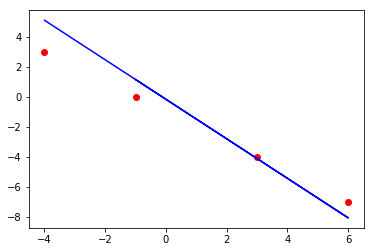

[array([-1.0125163], dtype=float32), array([-0.8176548], dtype=float32), 0.124453574]


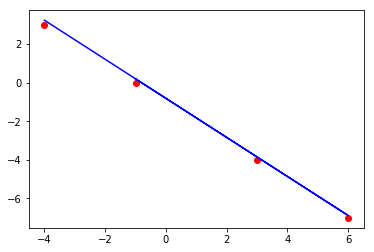

[array([-1.0026603], dtype=float32), array([-0.96124387], dtype=float32), 0.0056221243]


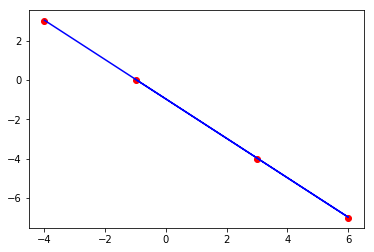

[array([-1.0005654], dtype=float32), array([-0.99176264], dtype=float32), 0.00025398118]


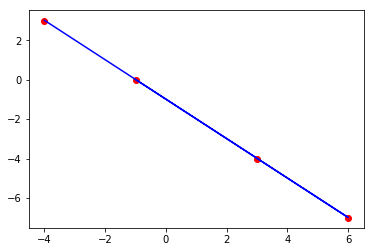

[array([-1.0001202], dtype=float32), array([-0.99824923], dtype=float32), 1.1472887e-05]


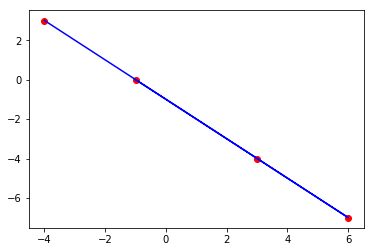

[array([-1.0000255], dtype=float32), array([-0.9996279], dtype=float32), 5.182889e-07]


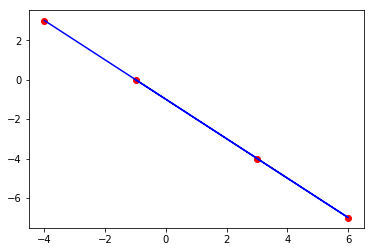

[array([-1.0000054], dtype=float32), array([-0.99992096], dtype=float32), 2.3391749e-08]


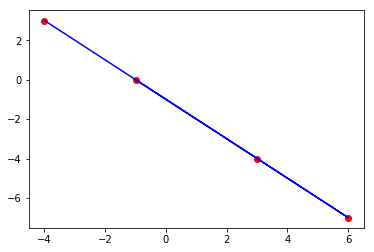

[array([-1.0000012], dtype=float32), array([-0.9999832], dtype=float32), 1.0536638e-09]


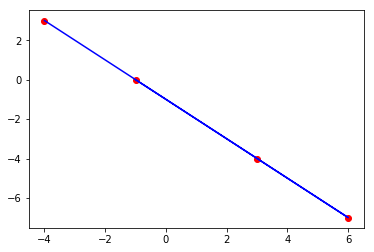

[array([-1.0000002], dtype=float32), array([-0.9999964], dtype=float32), 4.689582e-11]


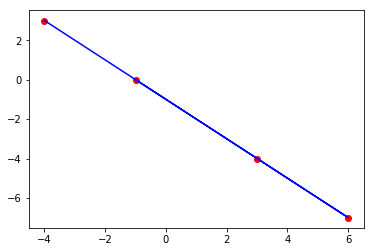

[array([-1.], dtype=float32), array([-0.99999917], dtype=float32), 3.424816e-12]


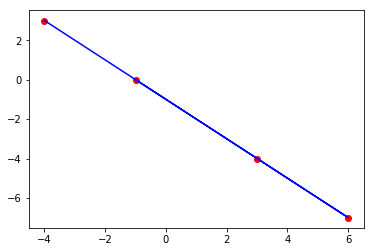

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


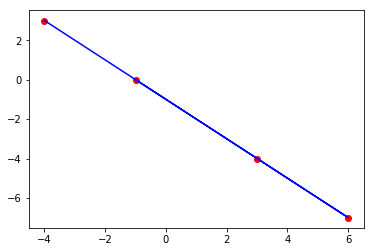

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


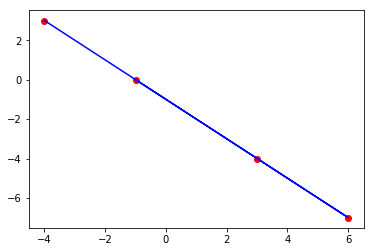

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


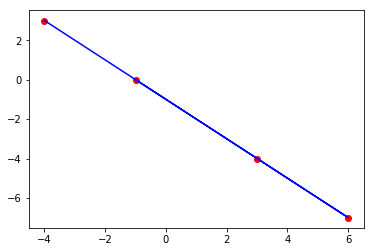

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


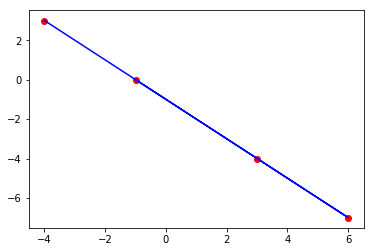

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


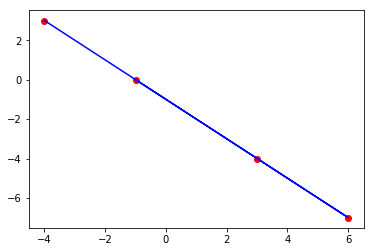

[array([-1.], dtype=float32), array([-0.9999997], dtype=float32), 4.2987836e-13]


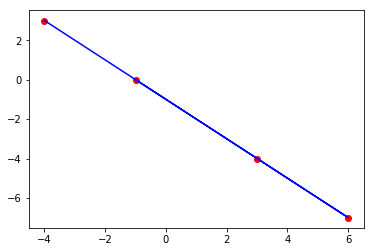

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 要学习一个 y = W * x + b
# 随便给个初始值
W = tf.Variable([0], dtype=tf.float32)  # 权重矩阵
b = tf.Variable([0.])                   # 偏置矩阵

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
y0 = W * x + b  # 用当前的W和b计算出来的结果

# 输入的x和y都是单个数，但是一次训练我们需要很多个数据
# 要算的是所有训练数据的总的误差
loss = tf.reduce_sum(tf.square(y0 - y))

# 使用自带的最优化函数来做，rate设置成0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
 
# 输入的训练数据，所以W=[-1], b=[-1]
x_train = [-1, 6, 3, -4]
y_train = [0, -7, -4, 3]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for i in range(301):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([W, b, loss], {x: x_train, y: y_train}))
            plt.clf()
            plt.scatter(x_train, y_train, c='r')
            calculated = sess.run(y0, {x: x_train})
            plt.plot(x_train, calculated, c='b')
            plt.pause(0.1)

### 神经网络架构可视化

直接使用Tensorboard即可。

使用Tensorboard的时候，可以定义网络中每个节点和部分的名字，如下：

- 单独一个节点：使用`name='XXX'`来定义在图中显示的名字；
- 可以整体用`with tf.name_scope('XXX')`来定义一部分图的名字；
- 使用`tf.summary.FileWriter('目录', sess.graph)`来记录整个图

之后在终端里面输入`tensorboard --logdir 目录`即可打开可视化工具的服务。接下来会在终端里面显示对应的网址信息，但是不要直接输入，找到其中的端口号，使用localhost对应端口号即可。

比如：

> 如下文代码所示，如果使用目录`C:\logs`就可以直接通过命令：`tensorboard --logdir=C:\logs`启动
>
> 之后会显示一些启动相关信息，如：`TensorBoard 1.12.2 at http://FHAsus:6006 (Press CTRL+C to quit)`
>
> 记住这里的端口号（一般会是6006），在浏览器中打开`http://localhost:6006`即可，这里的6006替换为上面看到的端口号

上面使用的学习异或的神经网络，进行可视化的例子如下所示：

In [1]:
import tensorflow as tf
import os

# 随便给一个记录的目录
path = r'C:\logs'

if not os.path.exists(path):
    os.mkdir(path)

def add_layer(inputs, in_size, out_size, activation_function=None):
    # 定义需要的weight和bias并且给出初始值
    with tf.name_scope('layer'):
        Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='Weight')
        biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='bias')
        # 线性计算的结果
        Wx_plus_b = tf.matmul(inputs, Weights) + biases
        # 最后加上激活函数，但是需要判断是否是空
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
    return outputs

# 接下来用add_layer来进行训练操作
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, shape=[None, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='answer')

with tf.name_scope('layers'):
    inner = add_layer(x, 2, 16, tf.nn.relu)
    y0 = add_layer(inner, 16, 1, tf.nn.sigmoid)

with tf.name_scope('loss'):
    loss = tf.reduce_sum(tf.square(y0 - y))

# 使用自带的最优化函数来做，rate设置成0.01
with tf.name_scope('train'):
    train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

x_train = [[0, 0], [1, 1], [0, 1], [1, 0]]
y_train = [[0], [0], [1], [1]]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    tf.summary.FileWriter(path, sess.graph)
    for i in range(8001):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([y0, loss], {x: x_train, y: y_train}))

[array([[0.48790708],
       [0.01568644],
       [0.04214205],
       [0.4712607 ]], dtype=float32), 1.4353566]
[array([[0.38773412],
       [0.0403716 ],
       [0.06908111],
       [0.6479839 ]], dtype=float32), 1.1424929]
[array([[0.3640263 ],
       [0.09346192],
       [0.12699749],
       [0.7400174 ]], dtype=float32), 0.9709747]
[array([[0.33878648],
       [0.21627468],
       [0.2745203 ],
       [0.794795  ]], dtype=float32), 0.72998095]
[array([[0.30150607],
       [0.3394888 ],
       [0.4646625 ],
       [0.80311894]], dtype=float32), 0.53150696]
[array([[0.27406928],
       [0.36364266],
       [0.56240547],
       [0.7914817 ]], dtype=float32), 0.44231883]
[array([[0.25273386],
       [0.35166833],
       [0.6123211 ],
       [0.77816015]], dtype=float32), 0.3870529]
[array([[0.23271018],
       [0.33507365],
       [0.6460774 ],
       [0.76742095]], dtype=float32), 0.34578264]
[array([[0.21588089],
       [0.319434  ],
       [0.67178535],
       [0.76246065]], dtype=

[array([[0.06654377],
       [0.08496586],
       [0.91976315],
       [0.923588  ]], dtype=float32), 0.023924021]
[array([[0.06608059],
       [0.08413854],
       [0.920488  ],
       [0.9242602 ]], dtype=float32), 0.023504613]
[array([[0.065565  ],
       [0.08340234],
       [0.9212    ],
       [0.92494905]], dtype=float32), 0.02309681]
[array([[0.06517127],
       [0.08262494],
       [0.9219231 ],
       [0.92558587]], dtype=float32), 0.022707641]
[array([[0.06465674],
       [0.08191604],
       [0.9226344 ],
       [0.9262225 ]], dtype=float32), 0.022319283]
[array([[0.06419557],
       [0.0811438 ],
       [0.9232988 ],
       [0.92679   ]], dtype=float32), 0.021948168]
[array([[0.06370717],
       [0.08040507],
       [0.9239067 ],
       [0.9273424 ]], dtype=float32), 0.021592896]
[array([[0.06333563],
       [0.07974664],
       [0.92462045],
       [0.9280269 ]], dtype=float32), 0.02123313]
[array([[0.0629131 ],
       [0.07904924],
       [0.92524785],
       [0.92859614

[array([[0.04395659],
       [0.05091219],
       [0.9515878 ],
       [0.9529238 ]], dtype=float32), 0.009084146]
[array([[0.04380706],
       [0.0506916 ],
       [0.95180416],
       [0.9531413 ]], dtype=float32), 0.009007276]
[array([[0.04363273],
       [0.05045139],
       [0.9520078 ],
       [0.953321  ]], dtype=float32), 0.0089313425]
[array([[0.04346878],
       [0.05023911],
       [0.95220643],
       [0.95353115]], dtype=float32), 0.008857083]
[array([[0.04331696],
       [0.05002072],
       [0.95242715],
       [0.9537201 ]], dtype=float32), 0.008783437]
[array([[0.04317109],
       [0.04979738],
       [0.95262456],
       [0.9539125 ]], dtype=float32), 0.008712013]
[array([[0.04300731],
       [0.0495815 ],
       [0.9528281 ],
       [0.95410323]], dtype=float32), 0.008639654]
[array([[0.04285705],
       [0.04937439],
       [0.95303077],
       [0.95428383]], dtype=float32), 0.008570634]
[array([[0.04268496],
       [0.04915491],
       [0.9532129 ],
       [0.95446

[array([[0.03518435],
       [0.03917427],
       [0.9626087 ],
       [0.96334094]], dtype=float32), 0.0055145584]
[array([[0.03509208],
       [0.0390638 ],
       [0.9627212 ],
       [0.96344304]], dtype=float32), 0.0054835523]
[array([[0.03500152],
       [0.03894441],
       [0.9628282 ],
       [0.96354675]], dtype=float32), 0.005452354]
[array([[0.03491179],
       [0.03882746],
       [0.96293384],
       [0.9636506 ]], dtype=float32), 0.0054215845]
[array([[0.03482144],
       [0.03871824],
       [0.96304417],
       [0.96375376]], dtype=float32), 0.005391158]
[array([[0.03474142],
       [0.0386018 ],
       [0.96314925],
       [0.9638525 ]], dtype=float32), 0.0053616827]
[array([[0.03465302],
       [0.03848625],
       [0.96325344],
       [0.9639479 ]], dtype=float32), 0.0053320876]
[array([[0.03456519],
       [0.03838088],
       [0.96336126],
       [0.9640528 ]], dtype=float32), 0.0053024427]
[array([[0.0344712 ],
       [0.03826799],
       [0.96346307],
       [0.

[array([[0.0298324 ],
       [0.03241577],
       [0.96897787],
       [0.9694158 ]], dtype=float32), 0.0038385214]
[array([[0.02976722],
       [0.0323495 ],
       [0.9690443 ],
       [0.96948326]], dtype=float32), 0.0038221031]
[array([[0.02971246],
       [0.03227761],
       [0.9691144 ],
       [0.9695467 ]], dtype=float32), 0.0038059982]
[array([[0.02965224],
       [0.0322062 ],
       [0.9691799 ],
       [0.9696072 ]], dtype=float32), 0.003790095]
[array([[0.02959997],
       [0.0321384 ],
       [0.9692463 ],
       [0.96967906]], dtype=float32), 0.0037741829]
[array([[0.02953929],
       [0.0320664 ],
       [0.9693093 ],
       [0.96973723]], dtype=float32), 0.0037585795]
[array([[0.02949082],
       [0.03199686],
       [0.96937704],
       [0.9698027 ]], dtype=float32), 0.003743151]
[array([[0.02943066],
       [0.03192578],
       [0.9694418 ],
       [0.96986234]], dtype=float32), 0.0037275027]
[array([[0.02937833],
       [0.03185705],
       [0.96950656],
       [0.

[array([[0.02627995],
       [0.02809502],
       [0.9730655 ],
       [0.97334766]], dtype=float32), 0.0029157805]
[array([[0.02623652],
       [0.02804656],
       [0.97311145],
       [0.97339034]], dtype=float32), 0.0029060324]
[array([[0.02619707],
       [0.02799825],
       [0.9731569 ],
       [0.97343767]], dtype=float32), 0.0028962963]
[array([[0.02615952],
       [0.02794882],
       [0.9732045 ],
       [0.97348106]], dtype=float32), 0.0028867102]
[array([[0.02611714],
       [0.02790116],
       [0.97325045],
       [0.9735256 ]], dtype=float32), 0.0028770133]
[array([[0.02607729],
       [0.02784973],
       [0.97329414],
       [0.97356737]], dtype=float32), 0.0028675196]
[array([[0.02603841],
       [0.02780243],
       [0.97333974],
       [0.9736119 ]], dtype=float32), 0.0028580758]
[array([[0.02599496],
       [0.02775394],
       [0.97338337],
       [0.9736527 ]], dtype=float32), 0.0028486433]
[array([[0.02595526],
       [0.02770552],
       [0.9734278 ],
       [

得到的结果如图所示：

![Tensorboard](Tensorflow03-NeuralNetwork.assets/1549862760932.png)

上面每一块都是一个name_scope，双击可以打开或者隐藏其中的具体内容。

### 训练进度可视化

在上文的基础上，给出训练过程中的loss等数据，可以使用summary进行记录。使用的是`tf.summary.histogram(名字, 节点)`和`tf.summary.scalar('loss', loss)`。前者用于权重、偏置的可视化，后者用于loss函数的可视化。

现在就添加上loss的变化曲线。

In [ ]:
import tensorflow as tf
import os

# 随便给一个记录的目录
path = r'C:\logs'

if not os.path.exists(path):
    os.mkdir(path)

def add_layer(inputs, in_size, out_size, layer_index, activation_function=None):
    # 定义需要的weight和bias并且给出初始值
    with tf.name_scope('layer%d' % layer_index):
        Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='Weight')
        biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='bias')
        # 线性计算的结果
        Wx_plus_b = tf.matmul(inputs, Weights) + biases
        # 最后加上激活函数，但是需要判断是否是空
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
    return outputs

# 接下来用add_layer来进行训练操作
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=[None, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='answer')

with tf.name_scope('layers'):
    inner = add_layer(x, 2, 16, 1, tf.nn.relu)
    y0 = add_layer(inner, 16, 1, 2, tf.nn.sigmoid)

with tf.name_scope('loss'):
    loss = tf.reduce_sum(tf.square(y0 - y))
    loss_scalar = tf.summary.scalar('loss', loss)

# 使用自带的最优化函数来做，rate设置成0.01
with tf.name_scope('train'):
    train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

x_train = [[0, 0], [1, 1], [0, 1], [1, 0]]
y_train = [[0], [0], [1], [1]]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    writer = tf.summary.FileWriter(path, sess.graph)
    sess.run(init)
    for i in range(8001):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([y0, loss], {x: x_train, y: y_train}))
            writer.add_summary(sess.run(loss_scalar, {x: x_train, y: y_train}), i)

[array([[0.74112135],
       [0.998628  ],
       [0.99964166],
       [0.9714218 ]], dtype=float32), 1.5473356]
[array([[0.4786777 ],
       [0.99786913],
       [0.9992398 ],
       [0.9507165 ]], dtype=float32), 1.2273046]
[array([[0.39536822],
       [0.99734527],
       [0.9990344 ],
       [0.9439189 ]], dtype=float32), 1.1541597]
[array([[0.35911533],
       [0.9971329 ],
       [0.9989297 ],
       [0.9402801 ]], dtype=float32), 1.1268054]
[array([[0.33126748],
       [0.9968876 ],
       [0.99882454],
       [0.9375475 ]], dtype=float32), 1.1074249]
[array([[0.30969912],
       [0.99658775],
       [0.9987093 ],
       [0.9344043 ]], dtype=float32), 1.0934051]
[array([[0.29056126],
       [0.99627954],
       [0.9985909 ],
       [0.9319069 ]], dtype=float32), 1.0816374]
[array([[0.273541  ],
       [0.9959501 ],
       [0.99846506],
       [0.9298234 ]], dtype=float32), 1.0716684]
[array([[0.2585826 ],
       [0.9955953 ],
       [0.99833053],
       [0.9277211 ]], dtype=floa

[array([[0.07200322],
       [0.07356764],
       [0.9358916 ],
       [0.9327648 ]], dtype=float32), 0.019227114]
[array([[0.07142535],
       [0.07288358],
       [0.936467  ],
       [0.93339133]], dtype=float32), 0.018886756]
[array([[0.07084607],
       [0.07216851],
       [0.9370294 ],
       [0.93392754]], dtype=float32), 0.018558323]
[array([[0.07030329],
       [0.07153892],
       [0.9375793 ],
       [0.9345897 ]], dtype=float32), 0.018235225]
[array([[0.06976046],
       [0.07092992],
       [0.9380982 ],
       [0.9351963 ]], dtype=float32), 0.017928932]
[array([[0.0692195 ],
       [0.07022904],
       [0.93862426],
       [0.93571484]], dtype=float32), 0.017623018]
[array([[0.06869457],
       [0.06966529],
       [0.9391395 ],
       [0.9362935 ]], dtype=float32), 0.017334718]
[array([[0.06812989],
       [0.06898046],
       [0.93962514],
       [0.93675977]], dtype=float32), 0.017044436]
[array([[0.06761878],
       [0.0684178 ],
       [0.94011915],
       [0.937313

[array([[0.04735048],
       [0.04577384],
       [0.9591205 ],
       [0.95762587]], dtype=float32), 0.007804012]
[array([[0.04722972],
       [0.04558472],
       [0.9592858 ],
       [0.9577867 ]], dtype=float32), 0.007748224]
[array([[0.04709941],
       [0.04538313],
       [0.9594377 ],
       [0.957971  ]], dtype=float32), 0.0076897196]
[array([[0.04698104],
       [0.04519578],
       [0.95960295],
       [0.9581273 ]], dtype=float32), 0.0076351203]
[array([[0.04685425],
       [0.04501282],
       [0.95975673],
       [0.9583066 ]], dtype=float32), 0.007579334]
[array([[0.04672983],
       [0.04481722],
       [0.9599143 ],
       [0.95845836]], dtype=float32), 0.007524829]
[array([[0.04660058],
       [0.04462066],
       [0.96005905],
       [0.9586056 ]], dtype=float32), 0.007471394]
[array([[0.04647983],
       [0.04445447],
       [0.96021825],
       [0.9587801 ]], dtype=float32), 0.0074182414]
[array([[0.04635421],
       [0.04425529],
       [0.9603595 ],
       [0.958

[array([[0.03923504],
       [0.034805  ],
       [0.9681907 ],
       [0.9668523 ]], dtype=float32), 0.004861376]
[array([[0.03914659],
       [0.0347027 ],
       [0.96827334],
       [0.96692353]], dtype=float32), 0.004837366]
[array([[0.03906671],
       [0.03459881],
       [0.9683511 ],
       [0.96699935]], dtype=float32), 0.0048139794]
[array([[0.03898585],
       [0.03450693],
       [0.96843463],
       [0.9670833 ]], dtype=float32), 0.0047905077]
[array([[0.03890301],
       [0.03440645],
       [0.96850777],
       [0.96716666]], dtype=float32), 0.004767037]
[array([[0.03882473],
       [0.03431762],
       [0.9685941 ],
       [0.96724975]], dtype=float32), 0.0047439705]
[array([[0.0387462 ],
       [0.03423149],
       [0.968676  ],
       [0.96733195]], dtype=float32), 0.00472146]
[array([[0.03867072],
       [0.03413368],
       [0.968751  ],
       [0.96741164]], dtype=float32), 0.0046990337]
[array([[0.03858726],
       [0.03404032],
       [0.9688317 ],
       [0.967

效果如图所示：

![loss_scalar](Tensorflow03-NeuralNetwork.assets/1549871569680.png)

如果还需要加上变量的范围数据，就：

- 使用`tf.summary.histogram`
- 使用`tf.summary.merge_all()`

*注：可能是tensorflow或者jupyter的问题，如果运行下面的代码不成功，可以考虑重新启动环境后再运行一次*

In [1]:
import tensorflow as tf
import os

# 随便给一个记录的目录
path = r'C:\logs'

if not os.path.exists(path):
    os.mkdir(path)

def add_layer(inputs, in_size, out_size, layer_index, activation_function=None):
    # 定义需要的weight和bias并且给出初始值
    with tf.name_scope('layer%d' % layer_index):
        Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='Weight')
        tf.summary.histogram('Weight', Weights)
        biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='bias')
        tf.summary.histogram('bias', biases)
        # 线性计算的结果
        Wx_plus_b = tf.matmul(inputs, Weights) + biases
        # 最后加上激活函数，但是需要判断是否是空
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
    return outputs

# 接下来用add_layer来进行训练操作
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=[None, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='answer')

with tf.name_scope('layers'):
    inner = add_layer(x, 2, 16, 1, tf.nn.relu)
    y0 = add_layer(inner, 16, 1, 2, tf.nn.sigmoid)

with tf.name_scope('loss'):
    loss = tf.reduce_sum(tf.square(y0 - y))
    loss_scalar = tf.summary.scalar('loss', loss)

# 使用自带的最优化函数来做，rate设置成0.01
with tf.name_scope('train'):
    train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

x_train = [[0, 0], [1, 1], [0, 1], [1, 0]]
y_train = [[0], [0], [1], [1]]

# 开始训练！
init = tf.global_variables_initializer()
with tf.Session() as sess:
    writer = tf.summary.FileWriter(path, sess.graph)
    merged = tf.summary.merge_all()
    sess.run(init)
    for i in range(8001):
        sess.run(train, {x: x_train, y: y_train})
        if i % 20 == 0:
            print(sess.run([y0, loss], {x: x_train, y: y_train}))
            writer.add_summary(sess.run(merged, {x: x_train, y: y_train}), i)

[array([[0.55704236],
       [0.85277396],
       [0.8107277 ],
       [0.7797784 ]], dtype=float32), 1.1218412]
[array([[0.45394218],
       [0.6935785 ],
       [0.6857112 ],
       [0.69714934]], dtype=float32), 0.87761056]
[array([[0.39754483],
       [0.5418103 ],
       [0.60022354],
       [0.63813406]], dtype=float32), 0.74236846]
[array([[0.37976545],
       [0.47094232],
       [0.58394825],
       [0.61885476]], dtype=float32), 0.6843792]
[array([[0.3694621 ],
       [0.44045877],
       [0.5951835 ],
       [0.61567205]], dtype=float32), 0.64209056]
[array([[0.36393648],
       [0.41971412],
       [0.6106653 ],
       [0.6183647 ]], dtype=float32), 0.60583675]
[array([[0.3614407 ],
       [0.4055506 ],
       [0.62652045],
       [0.6231996 ]], dtype=float32), 0.5765762]
[array([[0.35973158],
       [0.39253554],
       [0.64172214],
       [0.6287937 ]], dtype=float32), 0.5496481]
[array([[0.35718027],
       [0.3787858 ],
       [0.65443736],
       [0.6356235 ]], dtype=

[array([[0.11775436],
       [0.09040414],
       [0.91374314],
       [0.9045921 ]], dtype=float32), 0.03858191]
[array([[0.11663155],
       [0.08961755],
       [0.91456544],
       [0.9054442 ]], dtype=float32), 0.037874088]
[array([[0.11549657],
       [0.08877646],
       [0.9153104 ],
       [0.9062937 ]], dtype=float32), 0.03717392]
[array([[0.11441654],
       [0.08802085],
       [0.91614646],
       [0.90711075]], dtype=float32), 0.036498643]
[array([[0.11333296],
       [0.0872475 ],
       [0.9168653 ],
       [0.9079915 ]], dtype=float32), 0.035833426]
[array([[0.11234198],
       [0.08652987],
       [0.9175715 ],
       [0.9088485 ]], dtype=float32), 0.03521119]
[array([[0.1113073 ],
       [0.08581494],
       [0.91835135],
       [0.9096309 ]], dtype=float32), 0.034586594]
[array([[0.11029474],
       [0.08505496],
       [0.91900027],
       [0.9104099 ]], dtype=float32), 0.033986613]
[array([[0.10929061],
       [0.08432775],
       [0.9196921 ],
       [0.9111512 ]

[array([[0.0704395 ],
       [0.05528466],
       [0.9474603 ],
       [0.9422821 ]], dtype=float32), 0.0141098965]
[array([[0.0701053 ],
       [0.05502138],
       [0.9476845 ],
       [0.94253993]], dtype=float32), 0.013980674]
[array([[0.0697858 ],
       [0.05478606],
       [0.94794244],
       [0.9428185 ]], dtype=float32), 0.01385128]
[array([[0.06946157],
       [0.05453335],
       [0.9481637 ],
       [0.94307417]], dtype=float32), 0.01372635]
[array([[0.06914581],
       [0.05432024],
       [0.94840586],
       [0.9433507 ]], dtype=float32), 0.013602933]
[array([[0.06883655],
       [0.05406537],
       [0.9486196 ],
       [0.94359887]], dtype=float32), 0.013482567]
[array([[0.0685388 ],
       [0.05383846],
       [0.94885504],
       [0.9438684 ]], dtype=float32), 0.013362709]
[array([[0.06821328],
       [0.05357199],
       [0.9490536 ],
       [0.94408643]], dtype=float32), 0.013244873]
[array([[0.06790901],
       [0.05334553],
       [0.9492823 ],
       [0.9443459

[array([[0.0523733 ],
       [0.04136544],
       [0.9606403 ],
       [0.95707816]], dtype=float32), 0.007845533]
[array([[0.05221618],
       [0.04124461],
       [0.96076053],
       [0.9571987 ]], dtype=float32), 0.0077993358]
[array([[0.05206052],
       [0.04111502],
       [0.96086216],
       [0.95731854]], dtype=float32), 0.0077542206]
[array([[0.05190793],
       [0.04099535],
       [0.9609706 ],
       [0.95743775]], dtype=float32), 0.007709893]
[array([[0.05176261],
       [0.04089365],
       [0.9610941 ],
       [0.9575816 ]], dtype=float32), 0.0076646516]
[array([[0.05160758],
       [0.04076408],
       [0.96119606],
       [0.95769984]], dtype=float32), 0.007620102]
[array([[0.0514606 ],
       [0.04064838],
       [0.96130884],
       [0.95781404]], dtype=float32), 0.0075771455]
[array([[0.0513087 ],
       [0.04053826],
       [0.96141475],
       [0.957944  ]], dtype=float32), 0.007533463]
[array([[0.05116906],
       [0.04042963],
       [0.9615288 ],
       [0.95

[array([[0.04367097],
       [0.03447002],
       [0.9671803 ],
       [0.96428055]], dtype=float32), 0.005448347]
[array([[0.04357507],
       [0.0343908 ],
       [0.9672486 ],
       [0.96435446]], dtype=float32), 0.005424772]
[array([[0.04348124],
       [0.03432126],
       [0.9673227 ],
       [0.9644384 ]], dtype=float32), 0.0054010022]
[array([[0.04339024],
       [0.03424827],
       [0.9673967 ],
       [0.9645197 ]], dtype=float32), 0.0053774873]
[array([[0.04329375],
       [0.03416835],
       [0.96746516],
       [0.9645925 ]], dtype=float32), 0.00535403]
[array([[0.04320199],
       [0.03409662],
       [0.96753746],
       [0.9646649 ]], dtype=float32), 0.005331379]
[array([[0.04310754],
       [0.03401976],
       [0.9676031 ],
       [0.96474373]], dtype=float32), 0.005308168]
[array([[0.04301717],
       [0.03395313],
       [0.9676765 ],
       [0.9648242 ]], dtype=float32), 0.0052854363]
[array([[0.04292483],
       [0.0338757 ],
       [0.96774065],
       [0.9648

[array([[0.03802126],
       [0.0299881 ],
       [0.9714149 ],
       [0.9689451 ]], dtype=float32), 0.004126416]
[array([[0.03795532],
       [0.0299402 ],
       [0.97146386],
       [0.9690034 ]], dtype=float32), 0.0041121235]
[array([[0.03789337],
       [0.02989164],
       [0.9715154 ],
       [0.9690598 ]], dtype=float32), 0.004098084]
[array([[0.03782418],
       [0.02983479],
       [0.9715658 ],
       [0.9691106 ]], dtype=float32), 0.004083442]
[array([[0.0377585 ],
       [0.02978175],
       [0.97161406],
       [0.9691617 ]], dtype=float32), 0.0040694196]
[array([[0.0376947 ],
       [0.02973172],
       [0.97166395],
       [0.9692174 ]], dtype=float32), 0.004055364]
[array([[0.03763035],
       [0.02968158],
       [0.97171044],
       [0.9692737 ]], dtype=float32), 0.004041445]
[array([[0.03756913],
       [0.02963549],
       [0.9717622 ],
       [0.96932864]], dtype=float32), 0.004027809]
[array([[0.03749997],
       [0.02958057],
       [0.9718051 ],
       [0.9693

最后的效果如图：

![histograms](Tensorflow03-NeuralNetwork.assets/1549873941536.png)

![distributions](Tensorflow03-NeuralNetwork.assets/1549873993755.png)